In [23]:
#here we will predict the price of car using the given features

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import ExtraTreeRegressor
%matplotlib inline

In [65]:
df=pd.read_csv("car data.csv")

In [66]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
#here we can see that there are no missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [68]:
#here we have 9 features
df.shape

(301, 9)

In [69]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [71]:
#here 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'were our categorical features 
#we printed the unique values of these features for encoding
for i in df.columns[-4:-1]:
    print(i,":", df[i].unique())

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']


In [72]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [73]:
#here the car name is of no use because we are not able to judge by name but its features are taken into account
df.drop("Car_Name",axis=1,inplace=True)

In [74]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [75]:
#here we will convert the year column to the age columns of the car
#as with the age the value of car will depreciate
#we will create a new column ie current year
df["Current_Year"]=2020
df["Age"]=df["Current_Year"]-df['Year']
df.drop(["Current_Year","Year"],axis=1,inplace=True)


In [76]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [115]:
#now we will create encodings for categorical features
#as there are less no of categories and there unique values
#we will use one-hot encoding for the same 
#we will also use drop_first to avoid the dummy variable trap
df=pd.get_dummies(df,drop_first=True)

In [118]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [119]:
#here we will see the correlation
corr=df.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

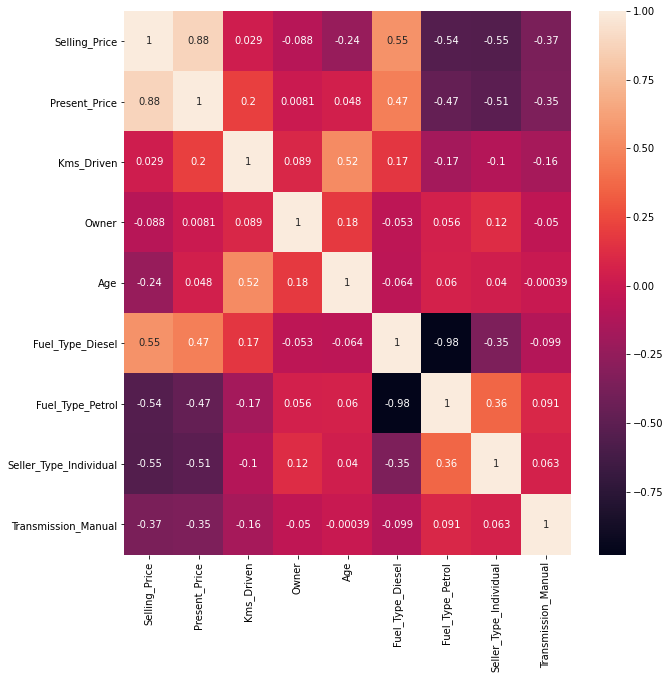

In [120]:
#seeing the correletion graphically 
top_corr=corr.index
plt.figure(figsize=(10,10))

sns.heatmap(corr,annot=True)



#here we can see that not all feature are highly correletd 
#as the features are less we will not drop the correlated features

In [121]:
#Now we will separate the the independent(X) and dependent(Y) variables
Y=df["Selling_Price"]
X=df.drop("Selling_Price",axis=1)
X.shape,Y.shape

((301, 8), (301,))

In [122]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [123]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [151]:
#check the feature importance 
model=ExtraTreeRegressor()
model.fit(X,Y)

ExtraTreeRegressor()

In [153]:
#here we can see that Present_Price ,Fuel_Type_Diesel,Seller_Type_Individual ,Transmission_Manual
#are most contributing to the car price


feature_imp=list(model.feature_importances_)
for i,name in enumerate (X.columns):
    print(name," : ",feature_imp[i])
    

Present_Price  :  0.2104306717713201
Kms_Driven  :  0.03241206689353515
Owner  :  0.00017861355607584186
Age  :  0.08035381497148288
Fuel_Type_Diesel  :  0.3050786904854902
Fuel_Type_Petrol  :  6.451203360289894e-07
Seller_Type_Individual  :  0.15453725511724808
Transmission_Manual  :  0.21700824208451178


<AxesSubplot:>

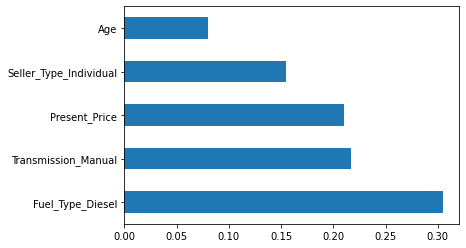

In [161]:
#plotting 5 largest contributing features
feature_pd=pd.Series(model.feature_importances_,index=X.columns)
feature_pd.nlargest(5).plot(kind='barh')


In [165]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [169]:
x_train.shape,x_test.shape

((240, 8), (61, 8))

In [189]:
#here we will use the random_forest regressor
#we didnt have to scale the values as random forest uses Decision Tree scaling is not required
#as we are splitting the values on the values

from sklearn.ensemble import RandomForestRegressor

In [183]:
#Hyperparameters
n_estimators=range(100,1000,100)
max_features=["auto", "sqrt", "log2"]
max_depth=range(5,30,5)
min_samples_split=[2,3,4]
min_samples_leaf=[1,2,3]

In [186]:
#here we will RandomizedSearchCV to find the best hyperparameters out of the given parameters
# The only difference between grid search is we define the combinations and do training of the model 
#whereas in RandomizedSearchCV the model selects the combinations randomly.
from sklearn.model_selection import RandomizedSearchCV

In [188]:
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [191]:
rf_model=RandomForestRegressor()
rf_random=RandomizedSearchCV(rf_model,random_grid,n_iter=10,cv=5,verbose=3,n_jobs=2)


In [192]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': range(5, 30, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': range(100, 1000, 100)},
                   verbose=3)

In [197]:
pred=rf_random.predict(x_test)

/Users/vaibhavdhand/opt/anaconda3/envs/Car_Dekho/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

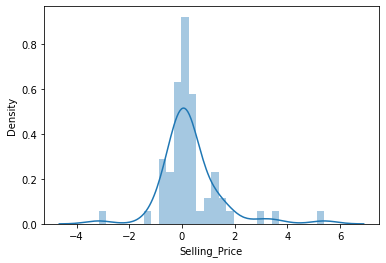

In [199]:
#it sould be minimum

sns.distplot(y_test-pred)

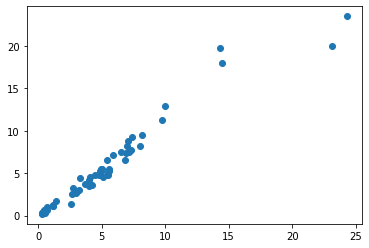

In [201]:
plt.scatter(pred,y_test)

In [205]:
import pickle

file=open("RF_CarDekho.pkl",'wb')

pickle.dump(rf_random,file)
